In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
# load data
data_all, label_all = load_data('gaussian2d') # 'iris') # 
data_num, feat_num = data_all.shape

# init painter
pca_painter = PaintPCA(data_all)
replay_painter = VisualiseReplay(data_all)


No PCA performed


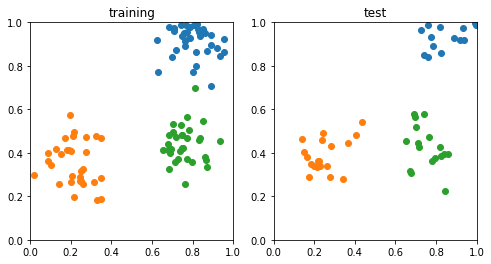

In [3]:
# prepare training and test data
randidx = np.random.permutation(data_num)
(data_train, data_test), (label_train, label_test) = [np.split(_all[randidx], [100]) for _all in (data_all, label_all)]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ls_title = 'training', 'test'
for a, title, data, label in zip(ax, ls_title, (data_train, data_test), (label_train, label_test)):
    pca_painter.scatter(a, label, data)
    a.set_xlim(0, 1)
    a.set_ylim(0, 1)
    a.set_title(title)

In [20]:
no_epoch = 100

rho_train = 0.6
rho_valid = 0.6
rho_test = 0.6
rho_replay = 0.6

alpha=1

replay_pathway = 'bottom-up' # 'top-down' # 
replay_scheme = 'in-box'
replay_num = 1000

unlearn_rule = 'norm-least-loss'
beta=0.01
std=-0.1

Category 0 is too small
Category 0 is too small
Directory  _simcache/frames_2022-06-06_11-22-16  Created 
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-17_learn[1654510937519732]


C:\Users\anish\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\anish\anaconda3\lib\site-packages\ipykernel_launcher.py:114: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


Category 0 is too small
Category 1 is too small
Category 0 is too small
Category 1 is too small
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-18_learn[1654510938400390]


C:\Users\anish\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\anish\anaconda3\lib\site-packages\ipykernel_launcher.py:114: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


Category 0 is too small
Category 0 is too small
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-19_learn[1654510939367790]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-20_learn[1654510940272386]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-21_learn[1654510941254281]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-22_learn[1654510942241655]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-23_learn[1654510943191638]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-24_learn[1654510944150604]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-25_learn[1654510945095078]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-26_learn[1654510946059522]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-27_learn[1654510947059847]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-22-27_learn[

figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-26_learn[1654511006126084]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-27_learn[1654511007151968]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-28_learn[1654511008175524]
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-29_learn[1654511009185838]
Category 4 is too small
Category 4 is too small
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-30_learn[1654511010276449]
Category 4 is too small
Category 4 is too small
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-31_learn[1654511011309545]
Category 4 is too small
Category 4 is too small
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-32_learn[1654511012339966]
Category 4 is too small
Category 4 is too small
figure saved at _simcache/frames_2022-06-06_11-22-16/2022-06-06_11-23-33_learn[1654511013361254]
Category 4 is too small
Category

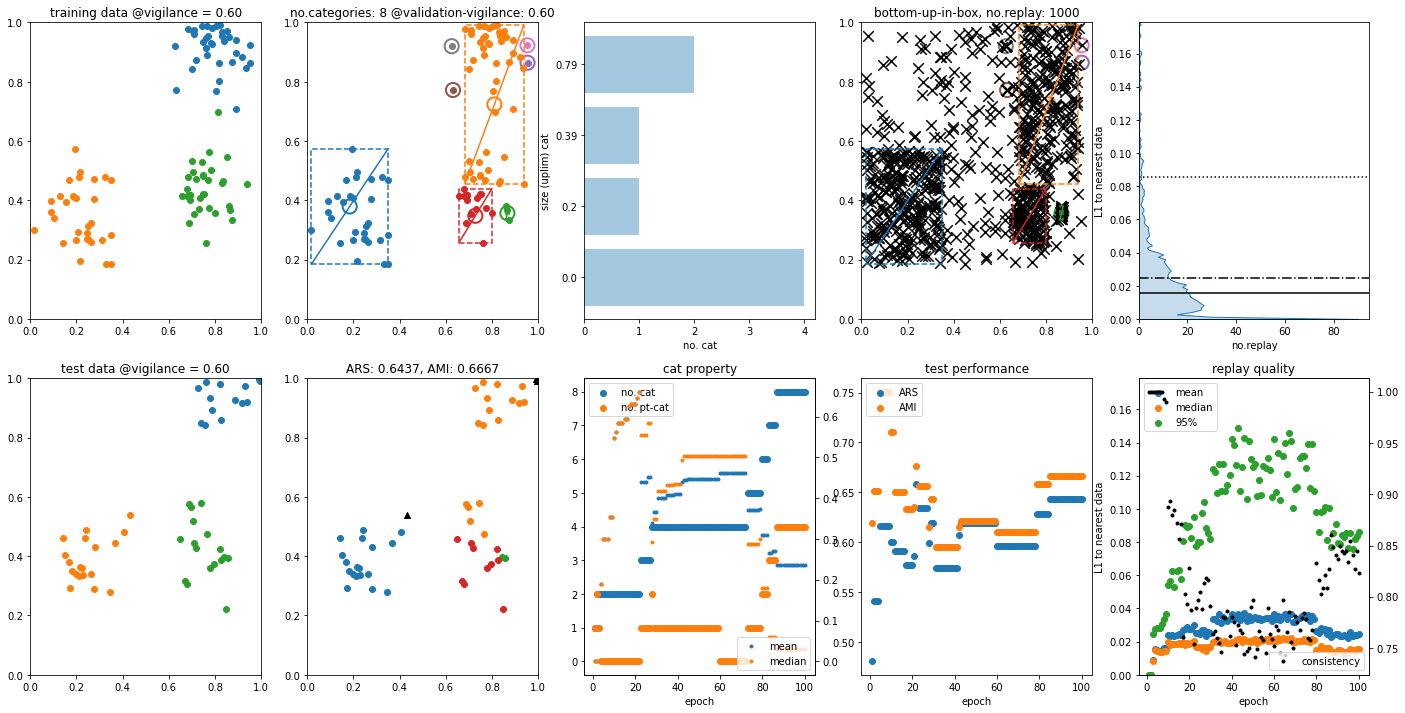

In [22]:
now = timestamp()[0]

# init fig
fig, ax = plt.subplot_mosaic('''
                                ABIDG
                                CEJFH
                                ''',
                                figsize = (24, 12))
for axidx, twidx in zip('HJ', 'hj'):
    ax[twidx] = ax[axidx].twinx()
#fig.tight_layout()

# plot training data
pca_painter.scatter(ax['A'], label_train, data_train)
ax['A'].set_title("training data @vigilance = {:.2f}".format(rho_train))

# plot test data
pca_painter.scatter(ax['C'], label_test, data_test)
ax['C'].set_title("test data @vigilance = {:.2f}".format(rho_test))


# init ART
net = FuzzyART(feat_num, alpha=alpha, gamma=.00001, rho=rho_train, best_match_num=2)
    
# prepare loop   
record_memory = np.zeros((no_epoch, 4))  # cat_num, point_cat_num, cat_sz_mean, cat_sz_median
record_test = np.zeros((no_epoch, 3))  # ARS, AMI, cat_num
record_replay = np.zeros((no_epoch, 4))  # mean, median, 95%, selfconsistency
rmax = 0

for epoch, data in zip(range(no_epoch), data_train):
    # clear fig
    for key in 'BDEFGHhIJj':
        ax[key].cla()
        
    # highlight training sample
    new_sample = [ax[key].scatter(*data, color='k', marker='x', s=666) for key in 'AB']
    
    # train
    net.train(data, rho=rho_train)
    
    # memory
    cat_number, point_cat_num, cat_sz_mean, cat_sz_median = replay_painter.property_of_memory(ax['I'], net)
    record_memory[epoch] = cat_number, point_cat_num, cat_sz_mean, cat_sz_median
    for l, rm in zip(('no. cat', 'no. pt-cat'), record_memory.T[:2]):
        ax['J'].scatter(np.arange(epoch+1)+1, rm[:epoch+1], label=l)

    for l, rm in zip(('mean', 'median'), record_memory.T[2:]):
        ax['j'].scatter(np.arange(epoch+1)+1, rm[:epoch+1], label=l, marker='.')
        
    ax['I'].set_xlabel('no. cat')
    ax['I'].set_ylabel('size (uplim) cat')
    
    # bipole, centre, boundary    
    for ak in 'BD':
        pca_painter.tripole(ax[ak], *net.getcat_bipole())
        ax[ak].set_prop_cycle(None)
        pca_painter.boundary(ax[ak], net.getcat_vertex())    
    
    # validation
    label_validall = net.test(data_train, rho_valid)
    label_valid = label_validall[:, 0].astype(int)
    
    # test
    label_testpall = net.test(data_test, rho_test)
    label_testp = label_testpall[:, 0].astype(int)
    
    test_ARS = metrics.adjusted_rand_score(label_test, label_testp)
    test_AMI = metrics.adjusted_mutual_info_score(label_test, label_testp)
    
    # test trajectory
    record_test[epoch] = test_ARS, test_AMI, cat_number        
    for l, tr in zip(('ARS', 'AMI'), record_test.T):
        ax['F'].scatter(np.arange(epoch+1)+1, tr[:epoch+1], label=l)
        
    # plot
    # validation and test
    pca_painter.scatter(ax['B'], label_valid, data_train)
    pca_painter.scatter(ax['E'], label_testp, data_test)
    
    ax['B'].set_title('no.categories: {} @validation-vigilance: {:.2f}'.format(cat_number, rho_valid))
    ax['E'].set_title('ARS: {:.4f}, AMI: {:.4f}'.format(test_ARS, test_AMI))
        
    # replay    
    replay = net.replay_self_test(replay_num, rho=rho_replay, s=0, pathway=replay_pathway, scheme=replay_scheme)
        
    ax['D'].scatter(*replay[0].T, color='k', marker='x', s=111)
    ax['D'].set_title('{}-{}, no.replay: {}'.format(replay_pathway, replay_scheme, replay_num))
    
    # replay histogram   
    record_replay[epoch, :3] = replay_painter.distance_to_truth(ax['G'], replay[0])
    ax['G'].set_xlabel('no.replay')
    
    # replay trajectory
    for l, rr in zip(('mean', 'median', '95%'), record_replay.T):
        ax['H'].scatter(np.arange(epoch+1)+1, rr[:epoch+1], label=l)
        rmax = np.maximum(rmax, np.max(rr))
    
    # replay consistence
    replay_selfconsistence = np.count_nonzero(replay[1] == replay[2]) / replay_num  
    record_replay[epoch, 3] = replay_selfconsistence
    ax['h'].scatter(np.arange(epoch+1)+1, record_replay[:epoch+1, 3], label='consistency', c='k', marker='.')
    
    # unlearn
    #net.unlearn_from_overlap(*replay, beta=beta, whichidx=unlearn_rule)
    
    
    # other info
    for key in 'ABCDE':
        ax[key].set_xlim(0, 1)
        ax[key].set_ylim(0, 1)
    
    for ak in 'GH':
        ax[ak].set_ylim(0, rmax * 1.2)
        ax[ak].set_ylabel('L1 to nearest data')
        
    for ak in 'hj':    
        ax[ak].legend(loc=4)
        
    for ak, title in zip('FHJ', ('test performance', 'replay quality', 'cat property')):
        ax[ak].legend(loc=2)
        ax[ak].set_xlabel('epoch')        
        ax[ak].set_title(title)
    
    # save fig
    simname = 'learn'
    dirname = '_simcache/frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]

